### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?
and also predict the sale for future data

### Importing necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split


### Loading data set

In [2]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\data_sets\\data sets\\Advertising.csv",index_col=[0])
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


#### Viewing top 5 rows of data

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### checking shape

In [4]:
df.shape

(200, 4)

#### checking info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


#### checking the missing values

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
#pip install missingno

In [8]:
import missingno as msno

<AxesSubplot:>

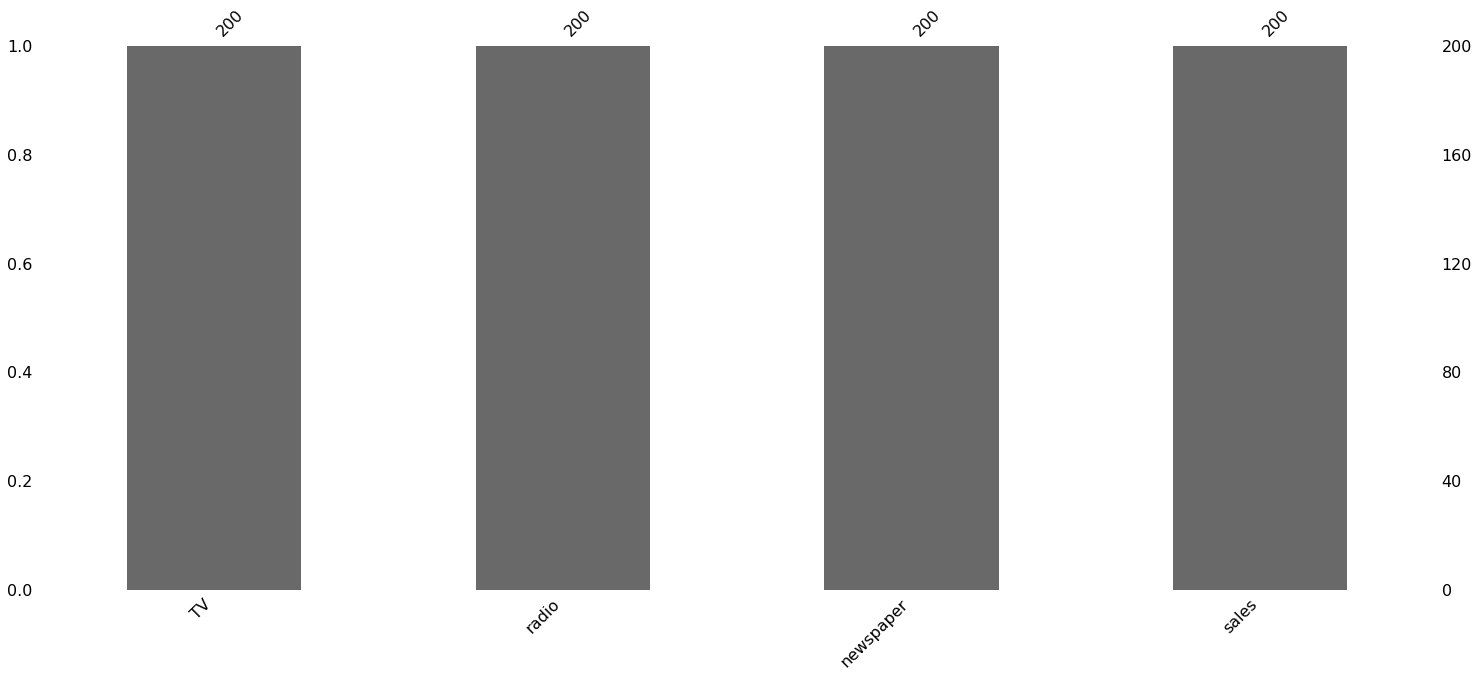

In [9]:
msno.bar(df)

- No missing Values

### 1st assumption: Linearing
#### Checking Linearity

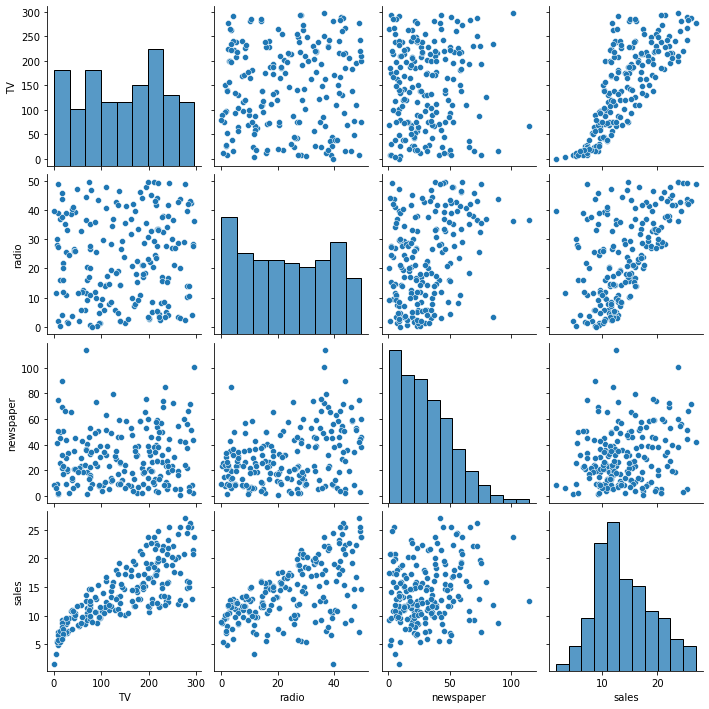

In [10]:
sns.pairplot(df)

##### From this output, we can say that there is a sort of linear relation between Tv and Sales.
#####  and there is not much linearity found with Radio and Sales and 
##### there is no linear relation between newspaper and sales.

### Finding correlation mathematically

<AxesSubplot:>

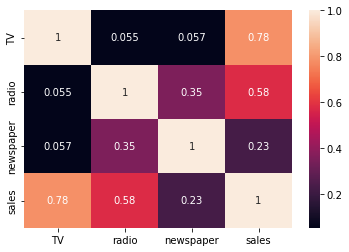

In [11]:
sns.heatmap(df.corr(),annot=True)

#### Distribution

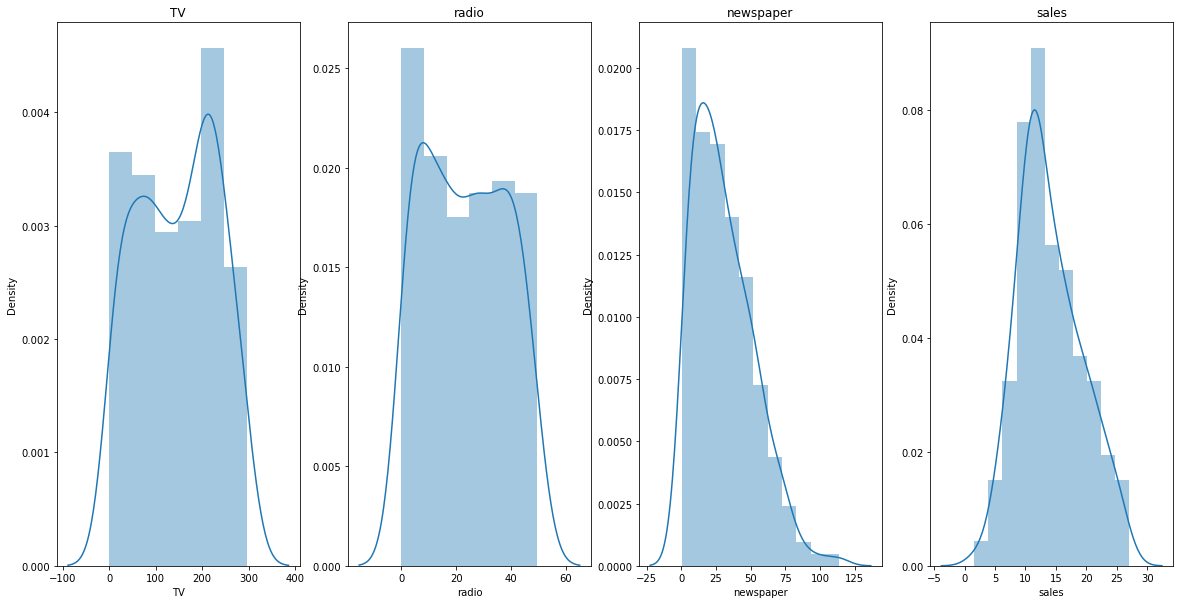

In [12]:
pos=1
plt.figure(figsize=(20,10))
for i in df.columns:
    plt.subplot(1,4,pos)
    sns.distplot(df[i])
    plt.title(i)
    pos=pos+1

- Normal distribution in sales

In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

### Checking Outliers

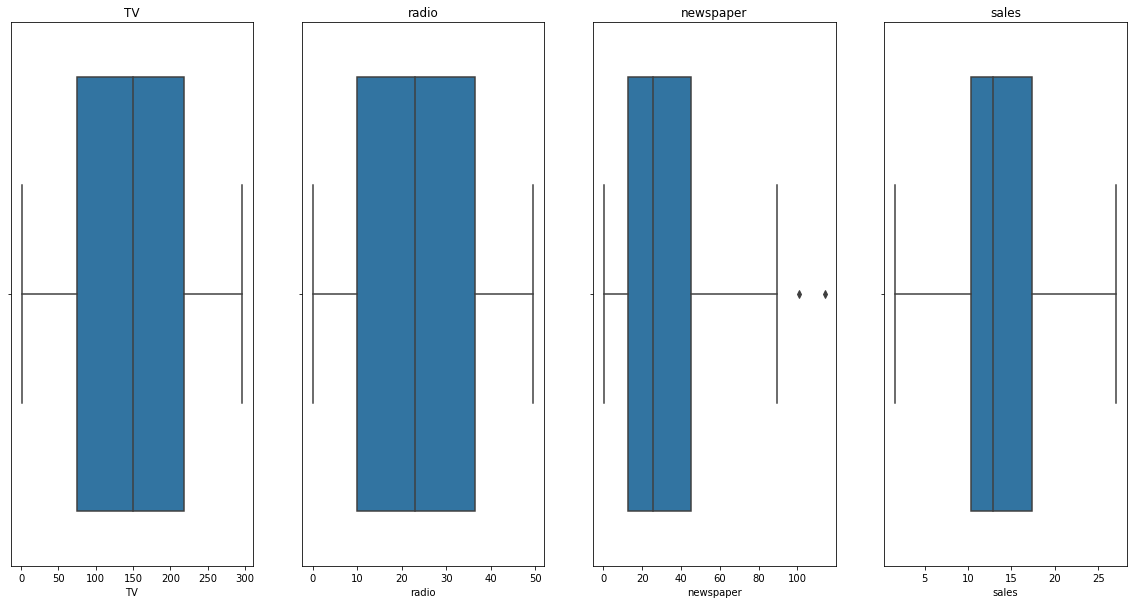

In [14]:
pos=1
plt.figure(figsize=(20,10))
for i in df.columns:
    plt.subplot(1,4,pos)
    sns.boxplot(df[i])
    plt.title(i)
    pos=pos+1

- Two outliers in Newspaper only

### Scaling will only for features 

In [15]:
### seggregate x and y
x=df.drop(columns=["sales"])   ##independent features
y=df["sales"]   ##target

In [16]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [17]:
x_scaled  ##scaled data, which is the requirement of linearity

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

### 2 Assumption: Multicoolinearity

In [18]:
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = x_scaled
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=x.columns
#vif["features"]
vif

,VIF,features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


### From this data, we can say that there is no multicoolinearity in  the data since VIF value for each feature is less than 4

## Splitting the data into train and test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

## checking the shape of train and test data

In [20]:
x_train.shape

(160, 3)

In [21]:
x_test.shape

(40, 3)

In [22]:
y_train.shape

(160,)

In [23]:
y_test.shape

(40,)

In [24]:
lr=LinearRegression()

#### Train the model

In [25]:
lr.fit(x_train,y_train)   ##model trained

LinearRegression()

In [26]:
lr.coef_  # 3 coefficient-radio,TV,Newspaper

array([4.01161205, 2.64417846, 0.05618258])

In [27]:
lr.intercept_

14.02854796400448

#### Here, my best fit line will be my best fit plane(3), and that plane passes through maximum no of points 

#### Evaluate the model

In [29]:
y_pred=lr.predict(x_test)

In [33]:
r2_score(y_test,y_pred)

0.8927605914615385

- Accuracy is close to 90%, accuracy is good

#### y=b1*x1+b2*x2*b3*x3+bo  equation of plane

#### y=4.01*tv+2.64*radio+0.05*newspaper +bo ,we will use this to predict the value of data

##### The amount invest on TV would be more effective to inrease the sale
- And how much the sales gets increased,
    -  4.01 times the amount spent on Tv.
    

future data

tv=100

radio=50

newspaper=40

In [37]:
y=4.01*100+2.64*50+0.05*40 +14
y

549.0

In [38]:
sale=549